<a href="https://colab.research.google.com/github/himanshu302002/ML-Regression-/blob/main/(Capstone_Project)ML_Regression_on_Retail_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GitHub Link -**

https://github.com/himanshu302002/ML-Regression-.git

# **Project Name**    - 



##### **Project Type**    - ML Regression on Retail Sales Prediction
##### **Contribution**    - Individual(Himanshu Goel)


# **Problem Statement**


### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.


DATA DESCRIPTION

### <b>Rossmann Stores Data.csv </b> - historical data including Sales

### <b>store.csv </b> - supplemental information about the stores
### Almost all of the fields are self-explanatory. The following is the  descriptions for those that aren't.


* #### Id - an Id that represents a (Store, Date) duple within the test set

* #### Store - a unique Id for each store

* #### Sales - the turnover for any given day (this is what you are predicting)

* #### Customers - the number of customers on a given day

* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open

* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools

* #### StoreType - differentiates between 4 different store models: a, b, c, d

* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended

* #### CompetitionDistance - distance in meters to the nearest competitor store

* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

* #### Promo - indicates whether a store is running a promo on that day

* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2

* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store




Importing Necessary Pyhton Libraries

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
import matplotlib
import matplotlib.pylab as pylab

%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8,6


import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoLars
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet




**Loading DATA**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading Dataset**

In [4]:
#Loading Rossman Dataset
rossman_df = pd.read_csv('Rossmann Stores Data.csv' )

<ipython-input-4-a3e3d67ad0d4>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  rossman_df = pd.read_csv('Rossmann Stores Data.csv' )


In [5]:
# Loading Store Dataset
store_df = pd.read_csv('store.csv')

**Let us Start by Analysing The Rossmann Dataset**

In [6]:
rossman_df.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
rossman_df.tail()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


**Necessary Information Analysis About Dataset**

In [8]:
rossman_df.shape


(1017209, 9)

Our dataset have 9 columns and more than a million rows

In [9]:
#Checking info of data 
rossman_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


 7 columns have integer and 2 columns have string as data type in our dataset

In [10]:
#Checking Null Values
rossman_df.isnull().sum()


Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

There are no null values in our dataset

**Dataset Summary in Statistical Form**

In [11]:
rossman_df.describe()


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [12]:
# Finding No. Of Stores in the Dataset
rossman_df.Store.nunique()


1115

In [13]:
# Finding Value_counts of StateHoliday Column
rossman_df.StateHoliday.value_counts()


0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

**Figuring out timeframe of our dataset**

In [14]:
print(rossman_df['Date'].min(),'initial')
print(rossman_df['Date'].max(),'final')


2013-01-01 initial
2015-07-31 final


**From 2013 to 2015 so we have a dataset of around 3 years.**

**Converting our Datatype**

In [15]:
# extract year, month, day and week of year from "Date"

rossman_df['Date']=pd.to_datetime(rossman_df['Date'])
rossman_df['Year'] = rossman_df['Date'].apply(lambda x: x.year)
rossman_df['Month'] = rossman_df['Date'].apply(lambda x: x.month)
rossman_df['Day'] = rossman_df['Date'].apply(lambda x: x.day)
rossman_df['WeekOfYear'] = rossman_df['Date'].apply(lambda x: x.weekofyear)


In [16]:
rossman_df.sort_values(by=['Date','Store'],inplace=True,ascending=[False,True])
rossman_df.head(2)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31


**Doing EDA On our Rossmann Dataset**

**Let us Create a Heatmap**

<ipython-input-17-8728f8903ebb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_map = rossman_df[rossman_df.columns].corr()


<Axes: >

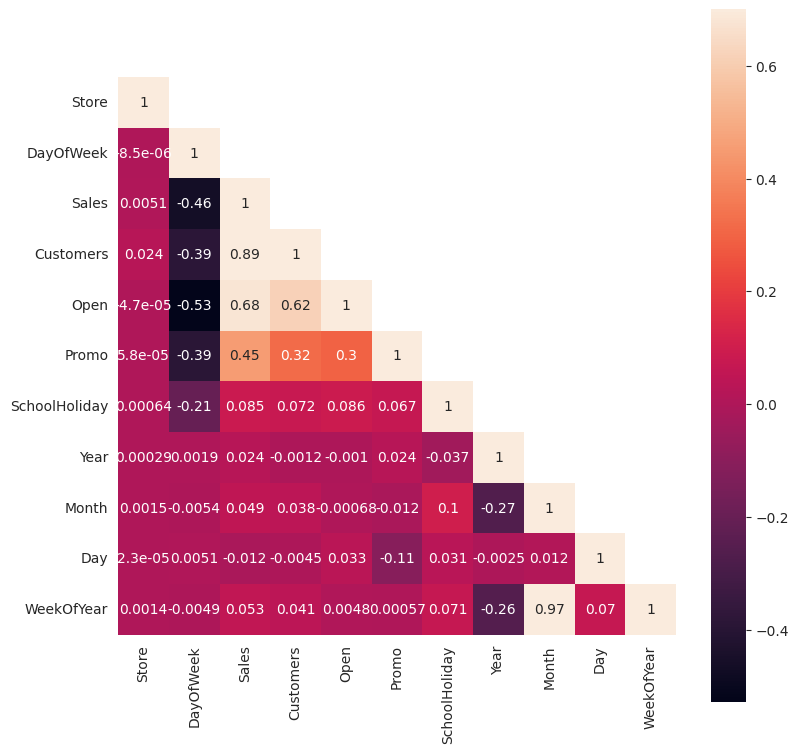

In [17]:
correlation_map = rossman_df[rossman_df.columns].corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(9,9)
sns.heatmap(correlation_map, mask=obj,vmax=.7, square=True,annot=True)


**Let us Figure out Closing Dates of Our Store**

<Axes: xlabel='DayOfWeek', ylabel='count'>

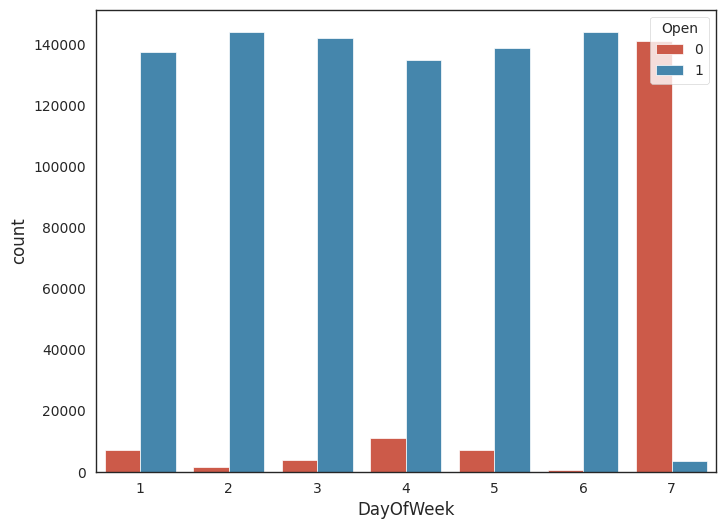

In [18]:
sns.countplot(x='DayOfWeek',hue='Open',data=rossman_df)


Our Store Mostly Remains Closed At Sunday 

**Impact of Promo on Sales**

<Axes: xlabel='Promo', ylabel='Sales'>

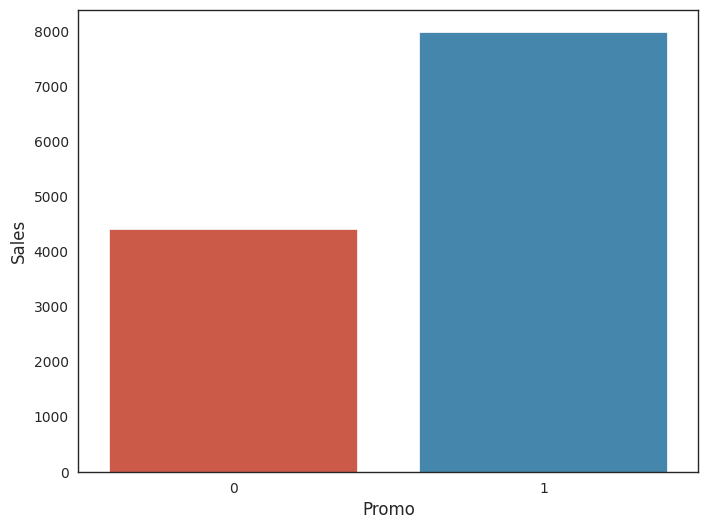

In [19]:
Promo_sales = pd.DataFrame(rossman_df.groupby('Promo').agg({'Sales':'mean'}))
sns.barplot(x=Promo_sales.index, y = Promo_sales['Sales'])


When Promo is Running Sales are almost Double

**Monthly Sales Prediction**

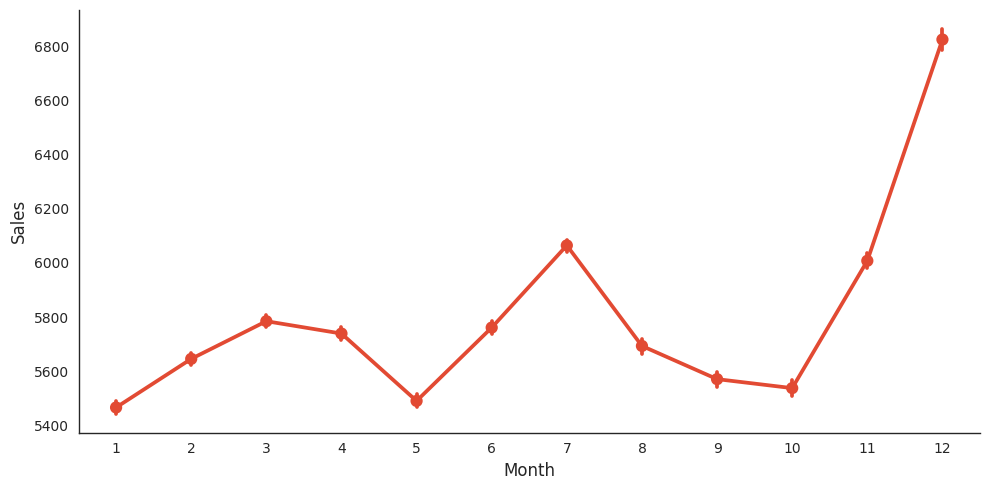

In [20]:

sns.catplot(x="Month" ,y = "Sales" , data=rossman_df, kind="point", aspect=2)


After July sales starts to drop and Increase at November and reaches its Peak at around Christmas eve.

**Value Counts of School Holiday**

In [21]:
rossman_df.SchoolHoliday.value_counts()


0    835488
1    181721
Name: SchoolHoliday, dtype: int64

**Sales Affected by School Holiday**

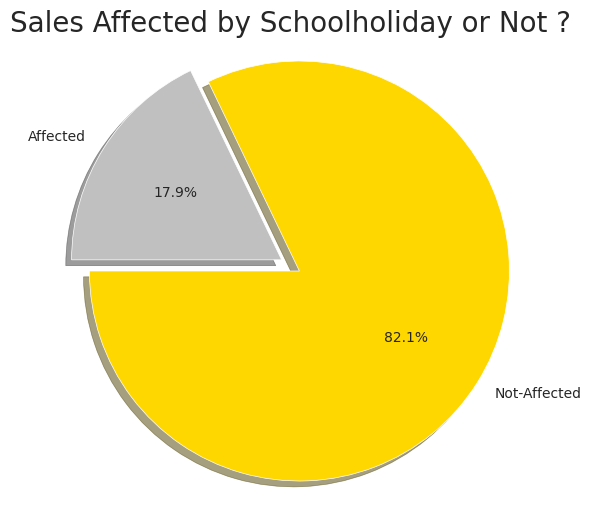

In [22]:
labels = 'Not-Affected' , 'Affected'
sizes = rossman_df.SchoolHoliday.value_counts()
colors = ['gold', 'silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()


Sales affected by school holiday is less than 20 percent so we can say that school holiday does not necessarily reduce sales percentage

### **Transforming Variable StateHoliday**


In [23]:
rossman_df["StateHoliday"] = rossman_df["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})


In [24]:
rossman_df.StateHoliday.value_counts()


0    986159
1     31050
Name: StateHoliday, dtype: int64

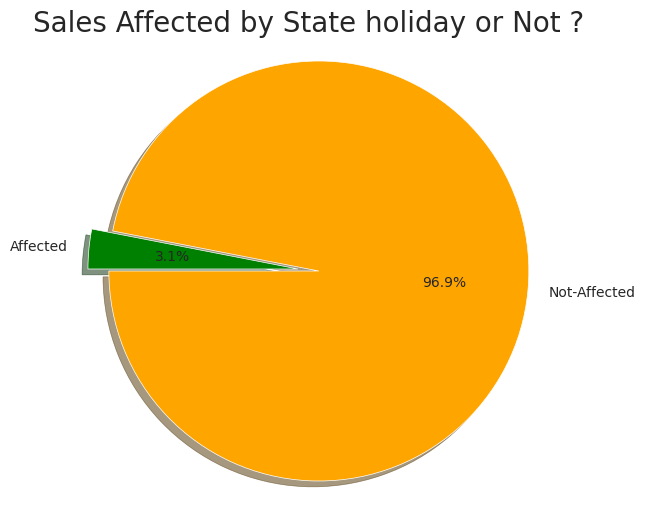

In [25]:
labels = 'Not-Affected' , 'Affected'
sizes = rossman_df.StateHoliday.value_counts()
colors = ['orange','green']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by State holiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()


**Clearly sales are not being affected by state holiday**

**Let us remove the state holiday column**

In [26]:
rossman_df.drop('StateHoliday',inplace=True,axis=1)


**Sales Distribution**

<ipython-input-27-9e973c764c7b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rossman_df['Sales'], kde = False,bins=40);


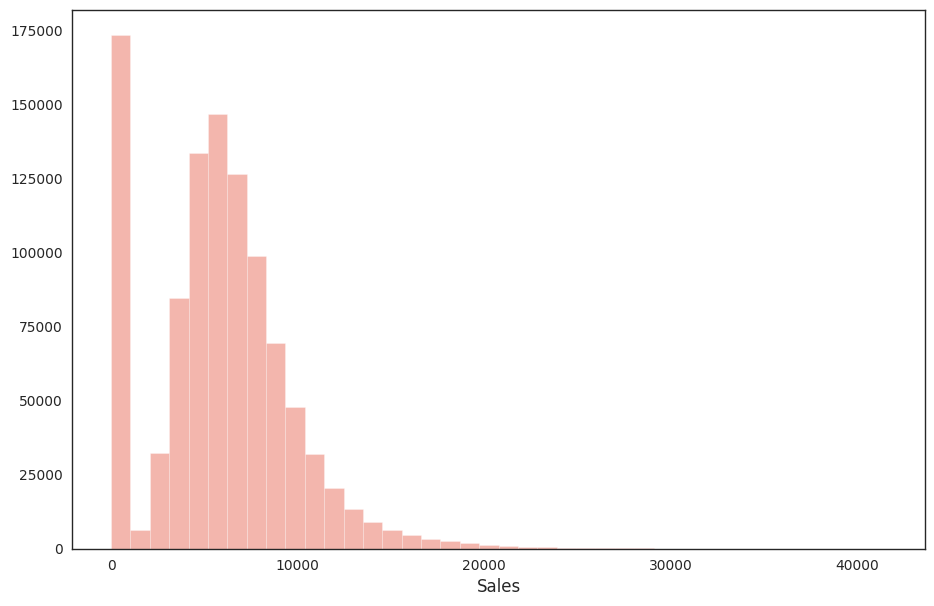

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.distplot(rossman_df['Sales'], kde = False,bins=40);


**Due to the reason of store being closed most of the time 0 is being showed**

**Customers vs Sales**

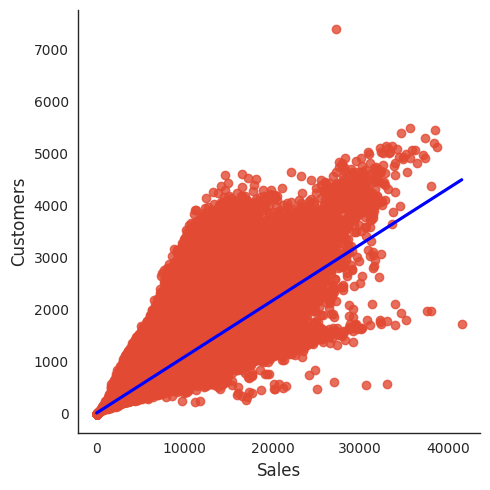

In [ ]:

sns.lmplot(x= 'Sales' , y ='Customers',data=rossman_df, palette='seismic', height=5,aspect=1, line_kws={'color':'blue'});


**The Relationship between Sales and Customer is Linear**

**Moving on to Analyze The Store Dataset**

In [28]:
store_df.head(5)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [29]:
store_df.tail()


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [30]:
store_df.shape


(1115, 10)

**Our Dataset have 10 Columns and around 1000 Rows**

**Analyzing our Dataset**

In [31]:
store_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


** Our Datatype  is float , integer , string as well**

**Checking Null Values**

In [32]:
store_df.isnull().sum()


Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

**This Time we do have Null Values That too in more than half our Columns**

**Let us Create a Heatmap For our Null Values**

<Axes: >

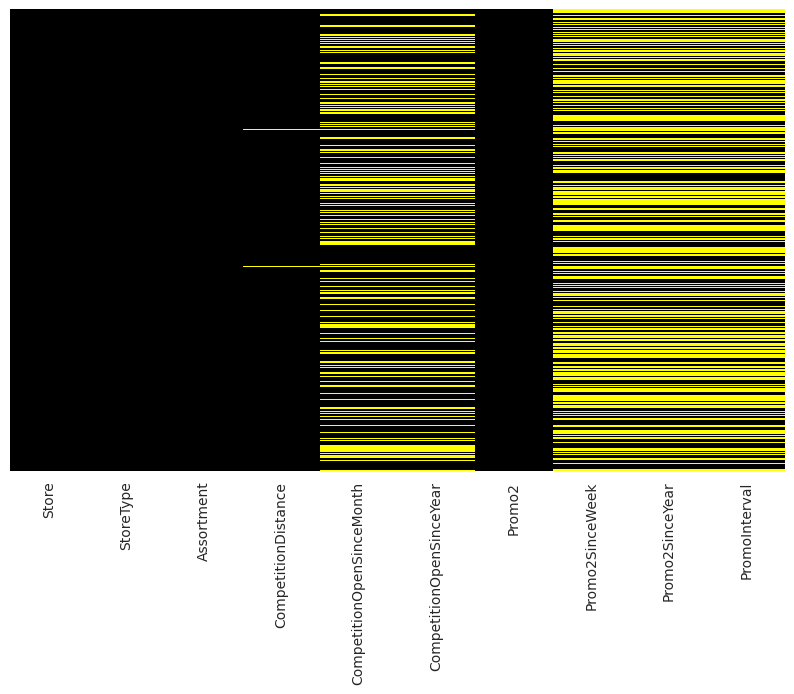

In [33]:
plt.figure(figsize=(10,6))
sns.heatmap(store_df.isnull(),yticklabels= False, cbar= False, cmap= 'gnuplot')


**Let us Check The Distribution of Different Store Types**

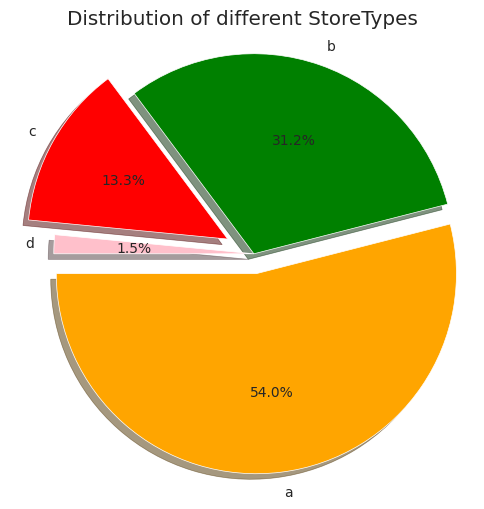

In [34]:
labels = 'a' , 'b' , 'c' , 'd'
sizes = store_df.StoreType.value_counts()
colors = ['orange', 'green' , 'red' , 'pink']
explode = (0.1, 0.0 , 0.15 , 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Distribution of different StoreTypes")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()


More than 50 percent of stores are of 'a' type and 'd' type have the least stores with less than 2 percent

**Removing Features With High Percentages of Missing Values**

Removing features with more than 30 percent missing values , to avoid inaccuracy .

In [35]:
store_df = store_df.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)


**Dropped 5 unnecessary Features to Increase Accuracy**

**Now , Let Us Replace The Missing Values of Features With Low Percentage of Missing Values**

<ipython-input-36-ba1d1c1ea979>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(store_df.CompetitionDistance.dropna())


Text(0.5, 1.0, 'Distributin of Store Competition Distance')

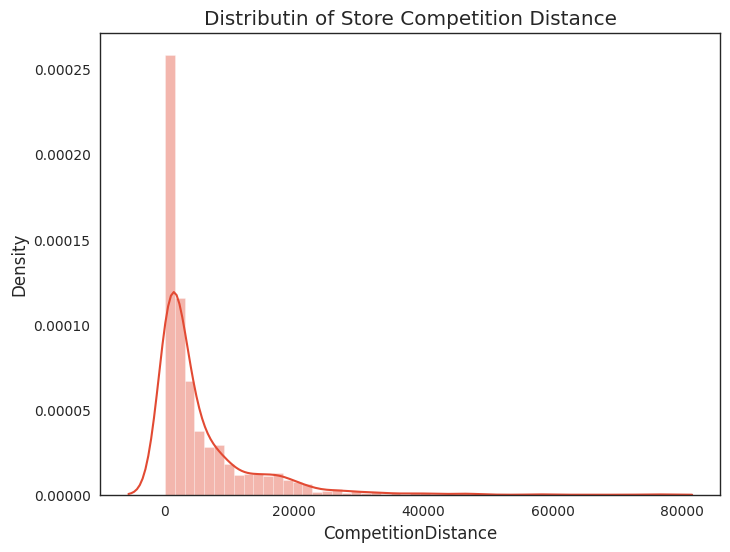

In [36]:
# CompetitionDistance is distance in meters to the nearest competitor store
# let's first have a look at its distribution
sns.distplot(store_df.CompetitionDistance.dropna())
plt.title("Distributin of Store Competition Distance")


**Clearly The Distribution Is Right Skewed, That Is Why We Will Have To Replace The Missing Values With The Median**

In [37]:
store_df.CompetitionDistance.fillna(store_df.CompetitionDistance.median(), inplace=True)


**Creating a Pair Plot For Our Store Dataset**

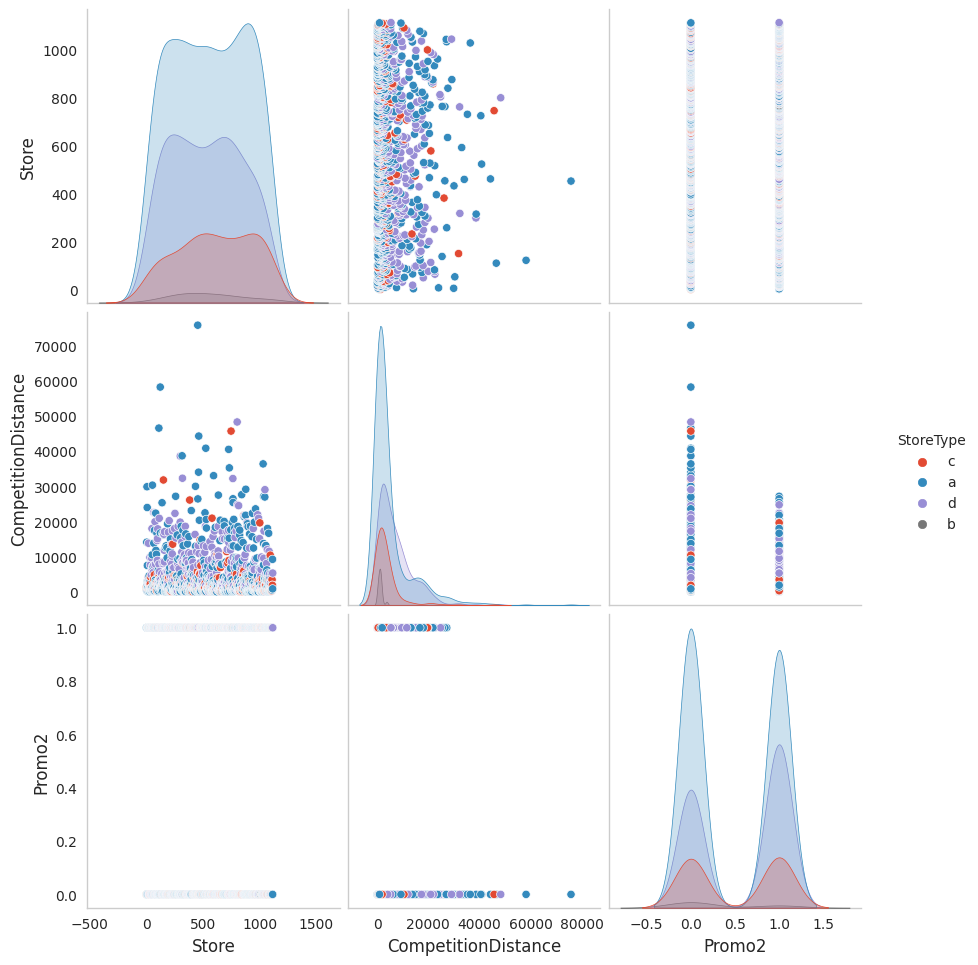

In [38]:
sns.set_style("whitegrid", {'axes.grid' : False})
pp=sns.pairplot(store_df,hue='StoreType')
pp.fig.set_size_inches(10,10);


**Now , Let us check Stores With Their Assortment Type**

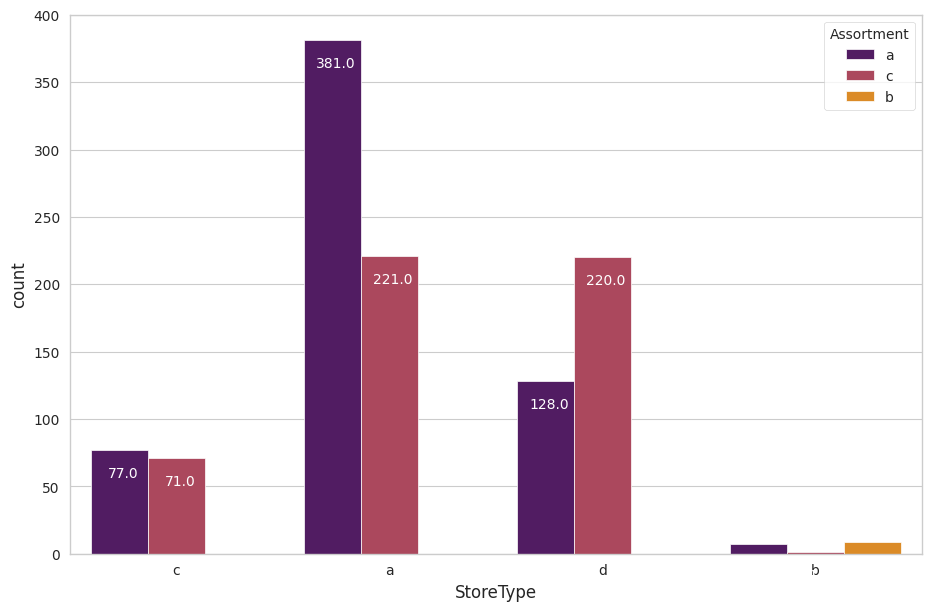

In [39]:
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
store_type=sns.countplot(x='StoreType',hue='Assortment', data=store_df,palette="inferno")
for p in store_type.patches:
    store_type.annotate(f'\n{p.get_height()}', (p.get_x()+0.15, p.get_height()),ha='center', va='top', color='white', size=10)


**Let us Merge Our Two Datasets**

In [40]:
df = pd.merge(rossman_df, store_df, how='left', on='Store')
df.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,1,2015,7,31,31,c,a,1270.0,0
1,2,5,2015-07-31,6064,625,1,1,1,2015,7,31,31,a,a,570.0,1
2,3,5,2015-07-31,8314,821,1,1,1,2015,7,31,31,a,a,14130.0,1
3,4,5,2015-07-31,13995,1498,1,1,1,2015,7,31,31,c,c,620.0,0
4,5,5,2015-07-31,4822,559,1,1,1,2015,7,31,31,a,a,29910.0,0


In [41]:
df.shape


(1017209, 16)

**Our Merged Dataset Have 16 Columns**

**Creating a Heatmap of Our Merged Dataset**

<ipython-input-42-4f2e82027cdd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().abs(), annot=True)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

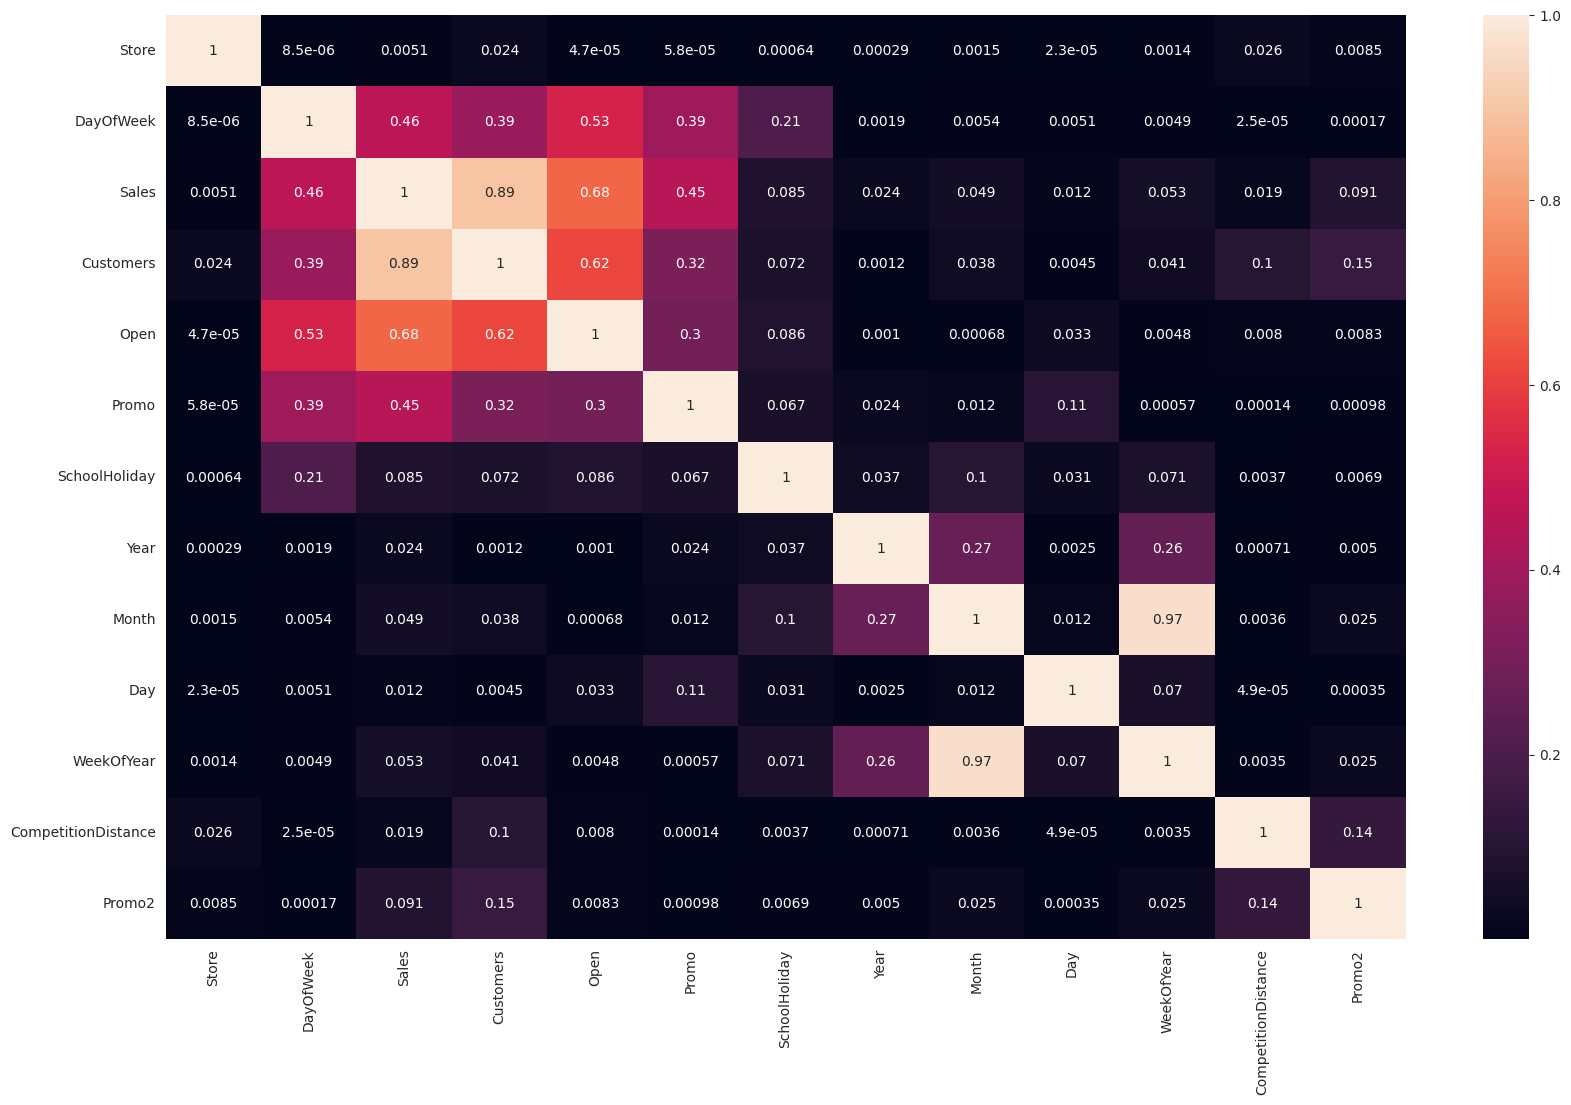

In [42]:
plt.subplots(figsize=(20,12))
sns.heatmap(df.corr().abs(), annot=True)
plt.savefig("heatmap.png")
from google.colab import files
files.download('heatmap.png') # this line opens your documents in your pc to save your png


In [43]:
df["Avg_Customer_Sales"] = df.Sales/df.Customers


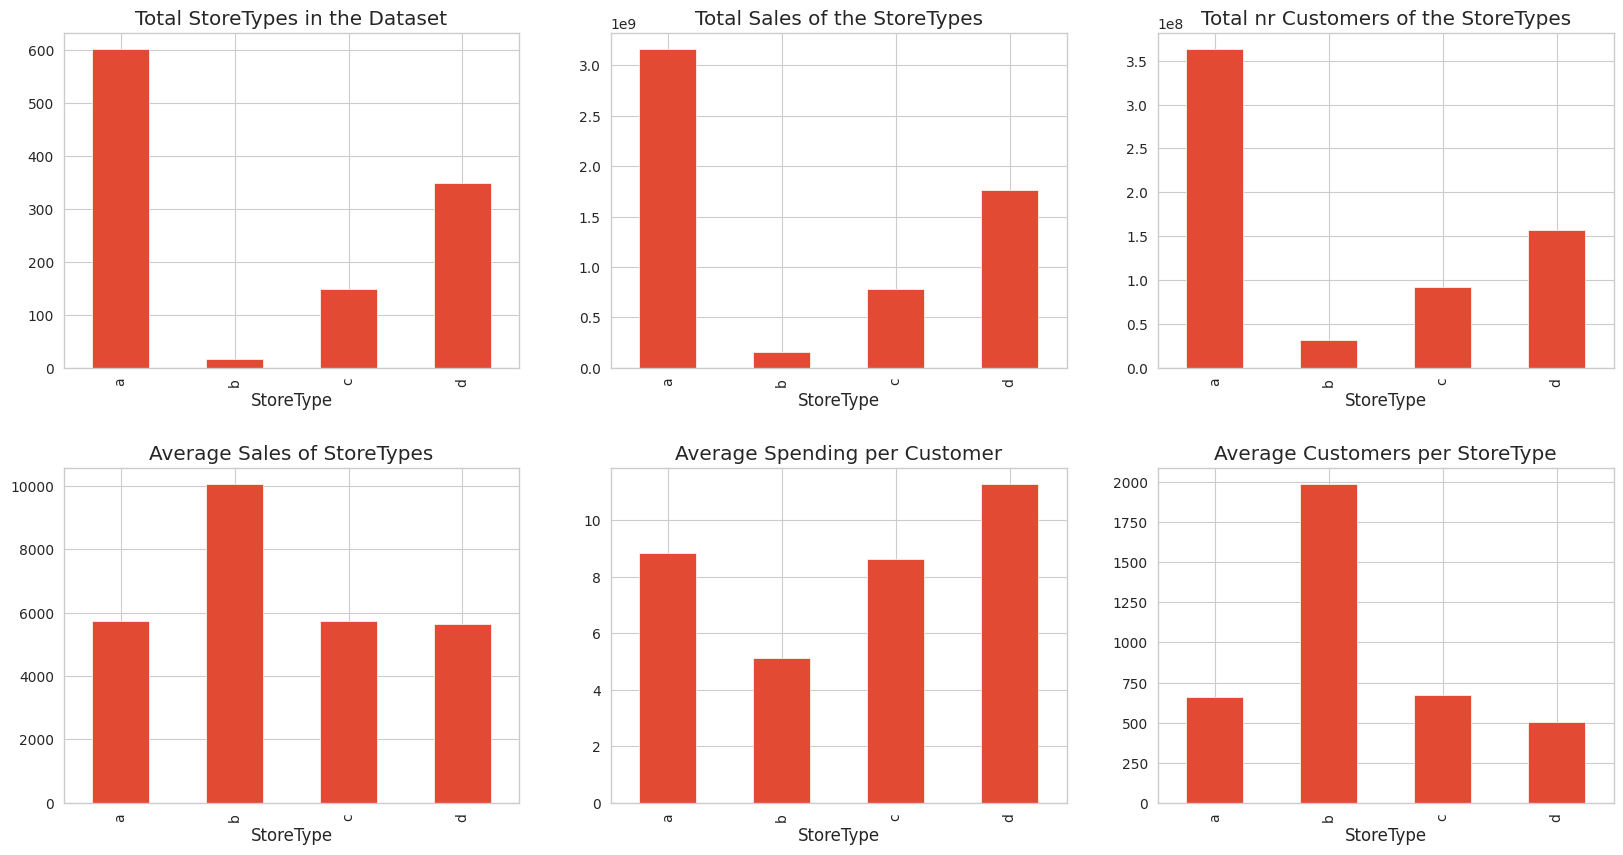

In [44]:
f, ax = plt.subplots(2, 3, figsize = (20,10))
store_df.groupby("StoreType")["Store"].count().plot(kind = "bar", ax = ax[0, 0], title = "Total StoreTypes in the Dataset")
df.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,1], title = "Total Sales of the StoreTypes")
df.groupby("StoreType")["Customers"].sum().plot(kind = "bar", ax = ax[0,2], title = "Total nr Customers of the StoreTypes")
df.groupby("StoreType")["Sales"].mean().plot(kind = "bar", ax = ax[1,0], title = "Average Sales of StoreTypes")
df.groupby("StoreType")["Avg_Customer_Sales"].mean().plot(kind = "bar", ax = ax[1,1], title = "Average Spending per Customer")
df.groupby("StoreType")["Customers"].mean().plot(kind = "bar", ax = ax[1,2], title = "Average Customers per StoreType")
plt.subplots_adjust(hspace = 0.3)
plt.show()


Some Noticable Points From our Graphs :
1. The Store Type 'a' has the most sales stores and customers
2. Store Type D Has The Best Average Spendings Per Customers
3. Store Type 'b' has only 17 stores , but most average customers.

**Now , Let us Check Promotions**

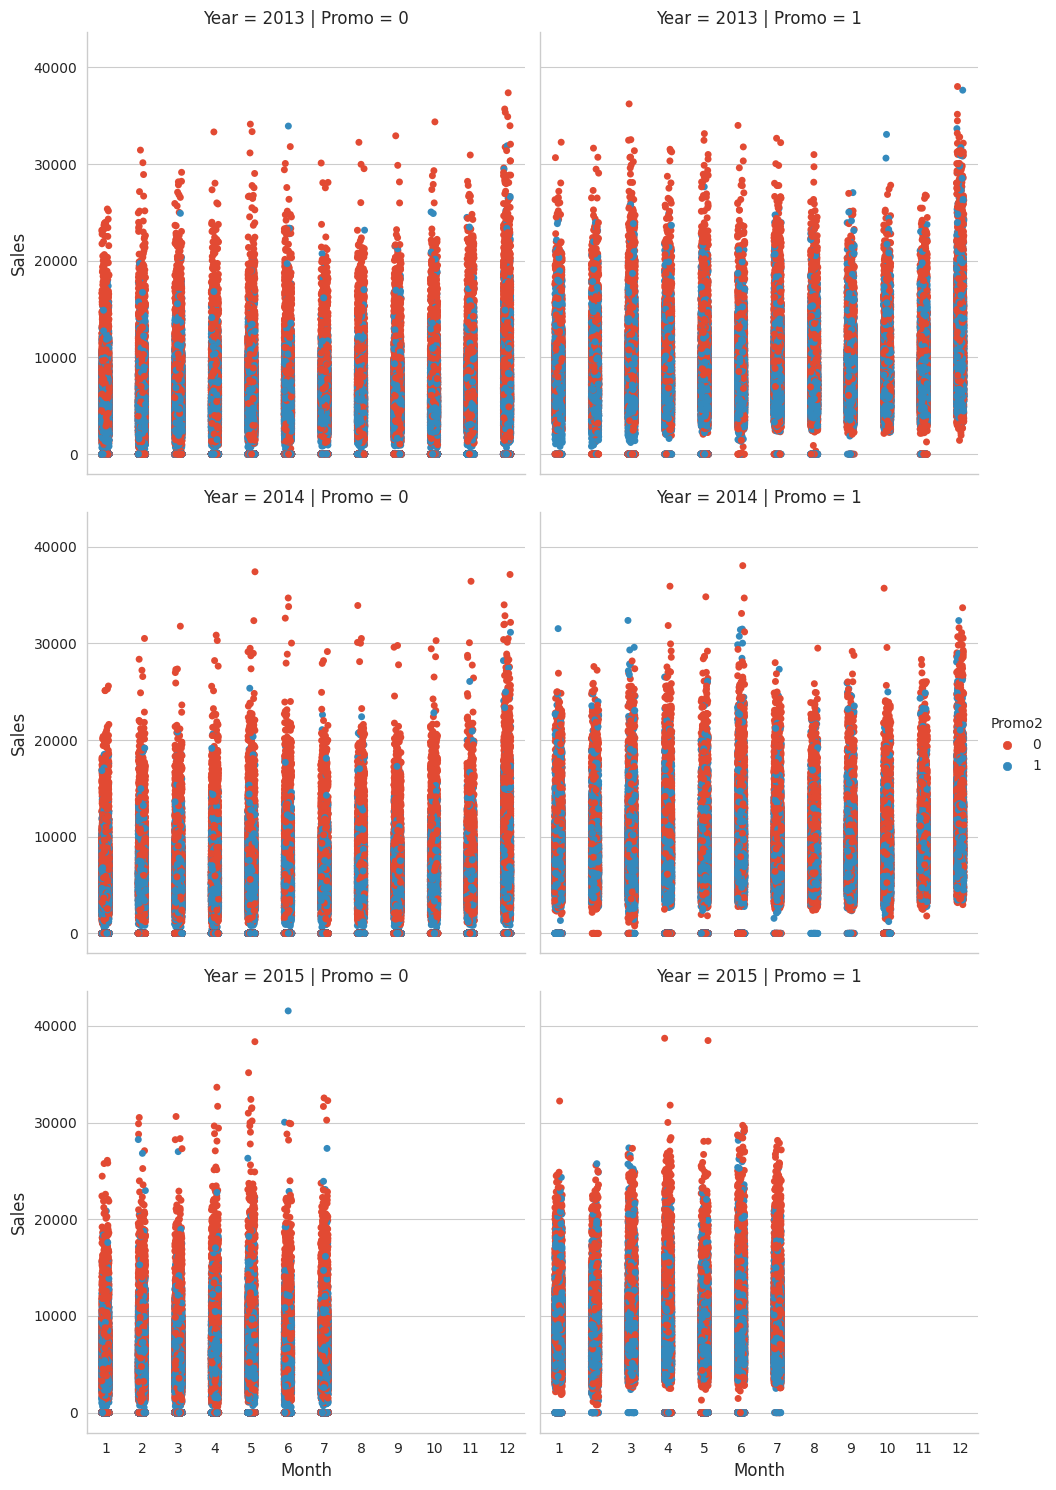

In [45]:
sns.catplot(data = df, x ="Month", y = "Sales", 
               col = 'Promo', # per store type in cols
               hue = 'Promo2',
               row = "Year"
             )
# So, of course, if the stores are having promotion the sells are higher.
# Overall the store promotions sellings are also higher than the seasionality promotions (Promo2). However I can't see no yearly trend. 
            


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self._figure.tight_layout(*args, **kwargs)


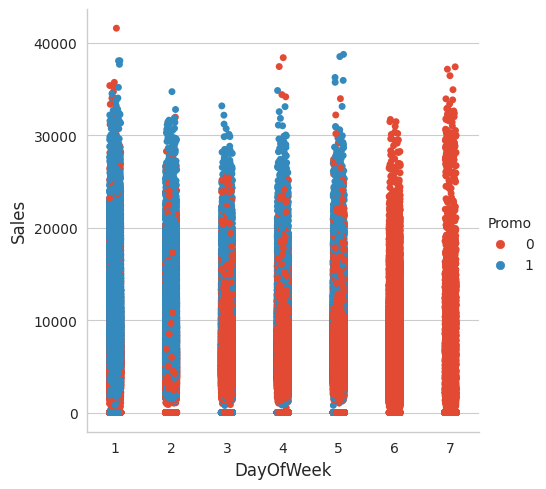

In [46]:
sns.catplot(data = df, x = "DayOfWeek", y = "Sales", hue = "Promo")



**Clearly when The Promo Runs , Sales gets Higher**

From the Graph , we can see no promotions are being done in the weekend.
The Sales are Very High , If the Stores Have Promotion.
Sales are Highest on Sunday

**Trends on Yearly Basis**

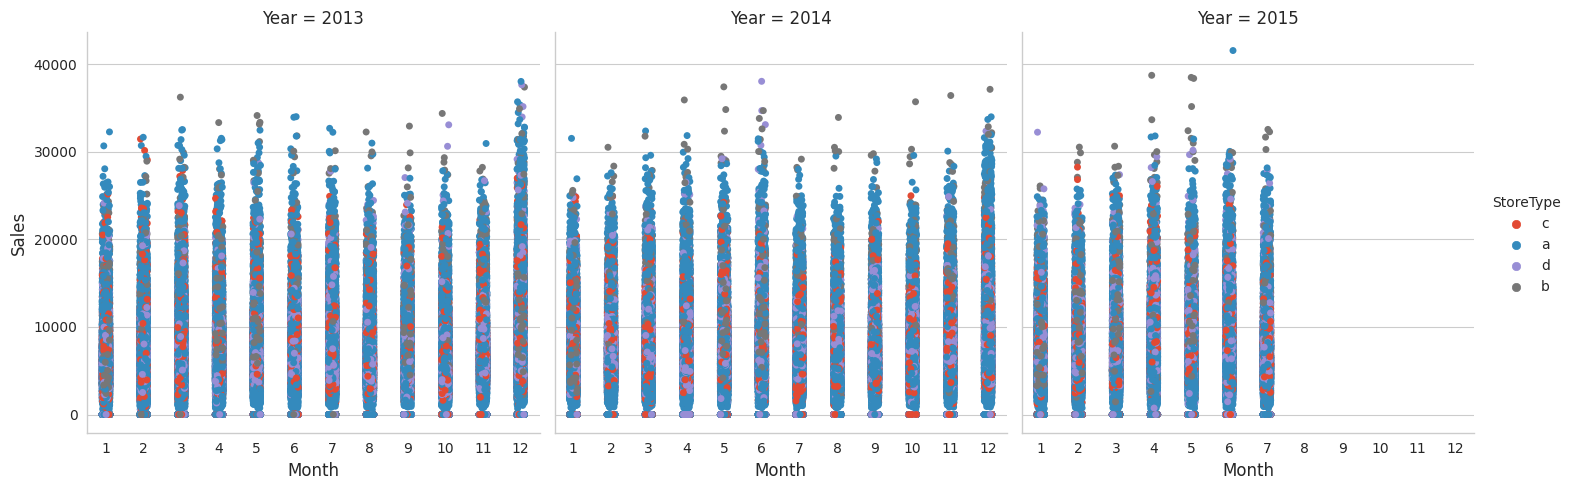

In [47]:
sns.catplot(data = df, x = "Month", y = "Sales", col = "Year", hue = "StoreType")


**There is no Clear Trend, Which means Sales Remain Constant Yearly**

**Impact of Competition Distance on Sales**

In [48]:
df.CompetitionDistance.describe()


count    1.017209e+06
mean     5.422021e+03
std      7.706918e+03
min      2.000000e+01
25%      7.100000e+02
50%      2.325000e+03
75%      6.880000e+03
max      7.586000e+04
Name: CompetitionDistance, dtype: float64

Creating a New Variable By Converting our Continous Numbers into a Categories.

In [49]:
df["CompetitionDistance_Cat"] = pd.cut(df["CompetitionDistance"], 5)


<Axes: title={'center': 'Average Total Customers by Competition Distance'}, xlabel='CompetitionDistance_Cat'>

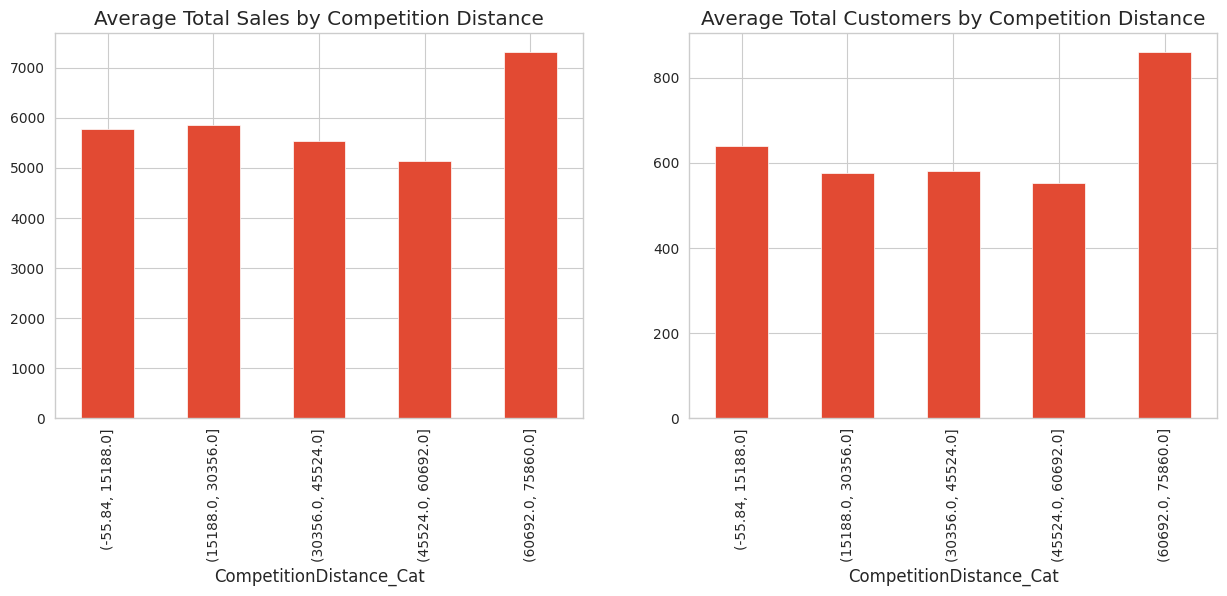

In [50]:
f, ax = plt.subplots(1,2, figsize = (15,5))
df.groupby(by = "CompetitionDistance_Cat").Sales.mean().plot(kind = "bar", title = "Average Total Sales by Competition Distance", ax = ax[0])
df.groupby(by = "CompetitionDistance_Cat").Customers.mean().plot(kind = "bar", title = "Average Total Customers by Competition Distance", ax = ax[1])


**If the competition is preety far away, then the stores seems to be performing better**

In [51]:
df.drop(['Avg_Customer_Sales','CompetitionDistance_Cat'],axis=1,inplace=True)


**Let Us Check For Outliers**

<Axes: >

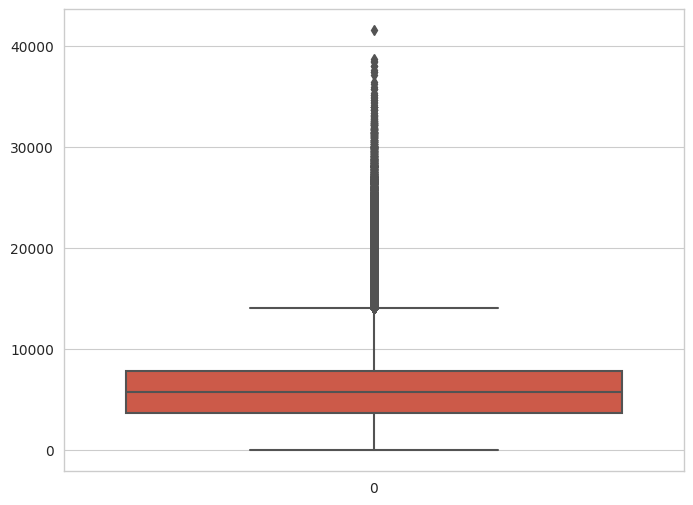

In [52]:
sns.boxplot(rossman_df['Sales'])


**Outlier is too much , we need to Deal with it**

**Let us First Remove Outliers of Sales Column**

In [53]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out


**Now That The Outlier is Removed , Let us Define a New Variable**

In [54]:
df= remove_outlier(df, 'Sales')


**Most important conclusions:**

**1.Sales are highly correlated to number of Customers.**

**2.The most selling and crowded store type is A.**

**3.StoreType B has the lowest Average Sales per Customer. So i think customers visit this type only for small things.**

**4.StoreTybe D had the highest buyer cart.**

**5.Promo runs only in weekdays.**

**6.For all stores, Promotion leads to increase in Sales and Customers both.**

**7.More stores are opened during School holidays than State holidays.**

**8.The stores which are opened during School Holiday have more sales than normal days.**

**9.Sales are increased during Chirstmas week, this might be due to the fact that people buy more beauty products during a Christmas celebration.**

**10.Promo2 doesnt seems to be correlated to any significant change in the sales amount.**

**11.Absence of values in features CompetitionOpenSinceYear/Month doesn’t indicate the absence of competition as CompetitionDistance values are not null where the other two values are null.**


**Dropping Subsets of Data With Risk of Causing Bias**

In [55]:
# where stores are closed, they won't generate sales, so we will remove that part of the dataset
df = df[df.Open != 0]


In [56]:
# Open isn't a variable anymore, so we'll drop it too
df = df.drop('Open', axis=1)


In [57]:
# Check if there's any opened store with zero sales
df[df.Sales == 0]['Store'].sum()


31460

In [58]:
# see the percentage of open stored with zero sales
df[df.Sales == 0]['Sales'].sum()/df.Sales.sum()


0.0

In [59]:
# remove this part of data to avoid bias
df = df[df.Sales != 0]


**Now creating a new df with dropped data **

In [60]:
df_new=df.copy()


In [61]:
df_new = pd.get_dummies(df_new,columns=['StoreType','Assortment'])


**Checking our new df**

In [62]:
df_new.head()


,Store,DayOfWeek,Date,Sales,Customers,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,CompetitionDistance,Promo2,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,5,2015-07-31,5263,555,1,1,2015,7,31,31,1270.0,0,0,0,1,0,1,0,0
1,2,5,2015-07-31,6064,625,1,1,2015,7,31,31,570.0,1,1,0,0,0,1,0,0
2,3,5,2015-07-31,8314,821,1,1,2015,7,31,31,14130.0,1,1,0,0,0,1,0,0
3,4,5,2015-07-31,13995,1498,1,1,2015,7,31,31,620.0,0,0,0,1,0,0,0,1
4,5,5,2015-07-31,4822,559,1,1,2015,7,31,31,29910.0,0,1,0,0,0,1,0,0


**Let us see Daily Sales**

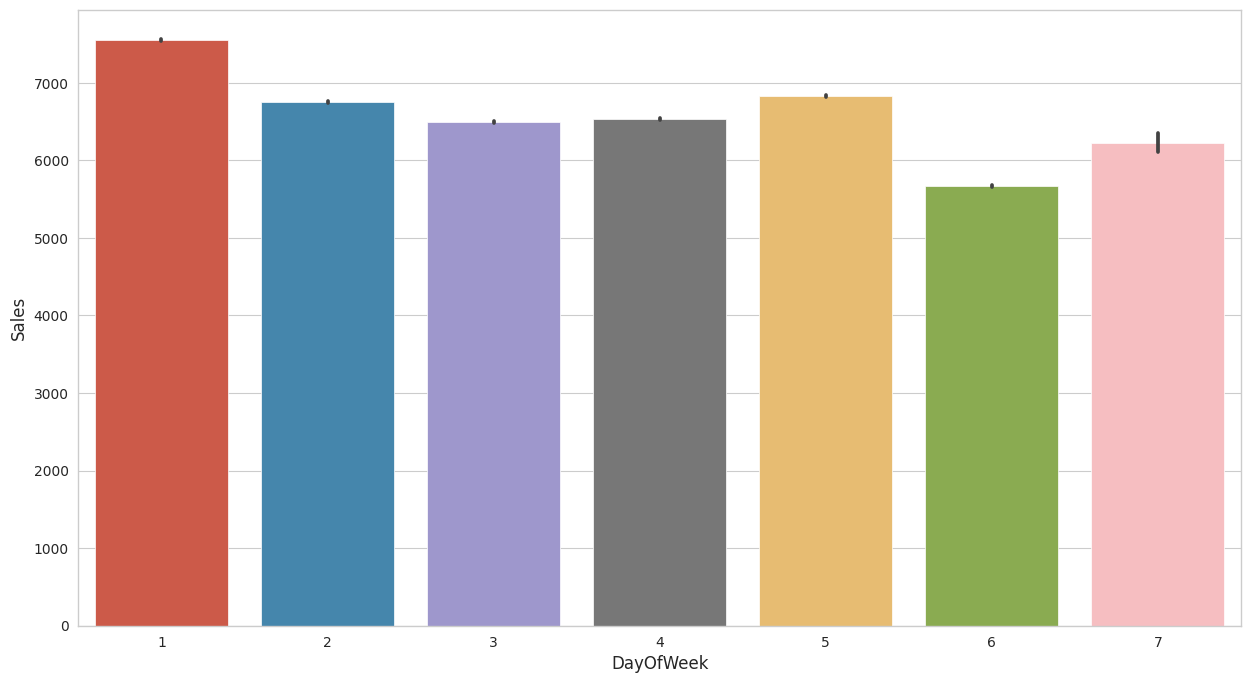

In [63]:
plt.figure(figsize=(15,8))
sns.barplot(x='DayOfWeek', y='Sales' ,data=df_new); 


**Most Sales are being done on First day of the week Followed by Last day of week and rest days have kind of equal sales**

**Now , Let us Set Target and Feature Varaibles**

In [64]:
X = df_new.drop(['Sales','Store','Date','Year'] , axis = 1)
y= df_new.Sales


In [65]:
X.shape


(817644, 16)

In [66]:
X.head()


,DayOfWeek,Customers,Promo,SchoolHoliday,Month,Day,WeekOfYear,CompetitionDistance,Promo2,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,5,555,1,1,7,31,31,1270.0,0,0,0,1,0,1,0,0
1,5,625,1,1,7,31,31,570.0,1,1,0,0,0,1,0,0
2,5,821,1,1,7,31,31,14130.0,1,1,0,0,0,1,0,0
3,5,1498,1,1,7,31,31,620.0,0,0,0,1,0,0,0,1
4,5,559,1,1,7,31,31,29910.0,0,1,0,0,0,1,0,0


In [67]:
y.head()


0     5263
1     6064
2     8314
3    13995
4     4822
Name: Sales, dtype: int64

**Time to split data:**

**Splitting Dataset to Training and Test Set**

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)


In [69]:
columns=X_train.columns


**Supervised Maching Learning Algorithms Implementation**

**Linear Regression:**

Transforming Data

In [70]:

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Fitting Multiple Linear Regression to the Training set

In [71]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [72]:
regressor.intercept_


-1507.441798569973

In [73]:
regressor.coef_


array([-1.30381346e+02,  3.06863041e+04,  1.09386001e+03,  2.29418388e+01,
        3.54223020e+02,  3.82831239e+01, -1.58021936e+02,  1.82430640e+03,
        3.10732033e+02,  3.18132398e+02, -1.90167603e+03,  1.67419398e+02,
        1.41612423e+03,  1.44688318e+03, -3.17950648e+03,  1.73262330e+03])

In [74]:
y_pred_train = regressor.predict(X_train)


**Time for Some Predictions:**

**Predicting Test Set Results **

In [75]:
y_pred = regressor.predict(X_test)


In [76]:
mean_squared_error(y_test, y_pred)


1329406.2402058854

**Test Performance**

In [77]:
math.sqrt(mean_squared_error(y_test, y_pred))


1152.998803210951

In [78]:
train_score_1=regressor.score(X_train,y_train)
train_score_1


0.7807496727472854

In [79]:
test_score_1=regressor.score(X_test,y_test)
test_score_1


0.7823919595957616

**Let us Store 100 observations for Analysis**

In [80]:
simple_lr_pred = y_pred[:100]
simple_lr_real = y_test[:100]
dataset_lr = pd.DataFrame({'Real':simple_lr_real,'PredictedLR':simple_lr_pred}) #storing these values into dataframe


In [81]:
#storing absolute diffrences between actual sales price and predicted
dataset_lr['diff']=(dataset_lr['Real']-dataset_lr['PredictedLR']).abs()


**Some Visualizations For our Predictions**

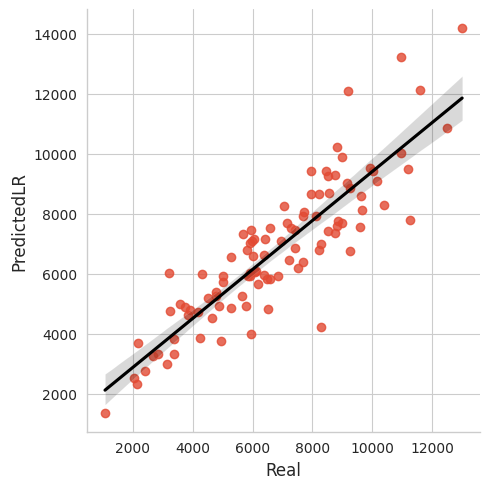

In [82]:
sns.lmplot(x='Real', y='PredictedLR', data=dataset_lr, line_kws={'color': 'black'});


**Inferences on Linear Regression Coefficients**

In [83]:
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                 2.086e+05
Date:                Mon, 12 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:00:41   Log-Likelihood:            -6.9257e+06
No. Observations:              817644   AIC:                         1.385e+07
Df Residuals:                  817629   BIC:                         1.385e+07
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -993.1075      5.669   -175.169      0.000   -1004.219    -981.996
DayOfWeek             -21.0704      0.785    -26.837      0.000     -22.609     -19.532
Customers               7.2260      0.005   1471.966      0.000       7.216       7.236
Promo                1093.4894      2.768    395.028      0.000    1088.064    1098.915
SchoolHoliday          27.2192      3.326      8.183      0.000      20.700      33.738
Month                  33.1415      1.433     23.134      0.000      30.334      35.949
Day                     1.2777      0.152      8.418      0.000       0.980       1.575
WeekOfYear             -3.3867      0.330    -10.267      0.000      -4.033      -2.740
CompetitionDistance     0.0240      0.000    140.522      0.000       0.024       0.024
Promo2                307.7765      2.662    115.635      0.000     302.560     312.993
StoreType_a            66.5792      4.780     13.929      0.000      57.211      75.948
StoreType_b         -2140.7862     12.728   -168.195      0.000   -2165.733   -2115.840
StoreType_c           -81.9285      5.313    -15.419      0.000     -92.342     -71.514
StoreType_d          1163.0279      5.024    231.517      0.000    1153.182    1172.874
Assortment_a         1114.6637      6.456    172.654      0.000    1102.010    1127.317
Assortment_b        -3510.5496     15.385   -228.183      0.000   -3540.703   -3480.396
Assortment_c         1402.7783      6.642    211.194      0.000    1389.760    1415.797
==============================================================================
Omnibus:                    49108.747   Durbin-Watson:                   1.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           145480.294
Skew:                           0.301   Prob(JB):                         0.00
Kurtosis:                       4.977   Cond. No.                     8.34e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.08e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**LARS Lasoo Regression**

In [84]:
las = LassoLars(alpha=0.3, fit_intercept=False, normalize=True)
lasreg = las.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_base.py:109: FutureWarning: 'normalize' was deprecated in version 1.2 and will be removed in 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [85]:
def rmse(x, y):
    return sqrt(mean_squared_error(x, y))
# definte MAPE function
def mape(x, y): 
    return np.mean(np.abs((x - y) / x)) * 100
train_score_2=lasreg.score(X_train, y_train)
test_score_2=lasreg.score(X_test, y_test)
print("Regresion Model Score" , ":" , train_score_2 , "," ,
      "Out of Sample Test Score" ,":" , test_score_2)
y_predicted = lasreg.predict(X_train)
y_test_predicted = lasreg.predict(X_test)
print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))


Regresion Model Score : 0.7807308911324253 , Out of Sample Test Score : 0.7823685232825739
Training RMSE : 1155.0769465274698 Testing RMSE : 1153.0608903320883
Training MAPE : 14.215633319957128 Testing MAPE : 14.233294529232587


**Decision Tree Regression**

In [86]:
tree = DecisionTreeRegressor()
treereg = tree.fit(X_train, y_train)


In [87]:
train_score_3=treereg.score(X_train, y_train)
test_score_3=treereg.score(X_test, y_test)
print("Regresion Model Score" , ":" , train_score_3 , "," ,
      "Test Score" ,":" , test_score_3)
y_predicted = treereg.predict(X_train)
y_test_predicted = treereg.predict(X_test)
print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))


Regresion Model Score : 0.9999957301266714 , Test Score : 0.9159570259525381
Training RMSE : 5.097176662035323 Testing RMSE : 716.5427294590598
Training MAPE : 0.0010365300881590655 Testing MAPE : 7.638806978035116


**Using Hyper Parameter Tuning For Our Decison Tree**

In [88]:
tree = DecisionTreeRegressor(min_samples_leaf=8,min_samples_split=5)
treereg = tree.fit(X_train, y_train)


In [89]:
train_score_4=treereg.score(X_train, y_train)
test_score_4=treereg.score(X_test, y_test)
print("Regresion Model Score" , ":" , train_score_4 , "," ,
      "Test Score" ,":" , test_score_4)
y_predicted = treereg.predict(X_train)
y_test_predicted = treereg.predict(X_test)
print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))


Regresion Model Score : 0.9635058030756848 , Test Score : 0.9354387526618709
Training RMSE : 471.231263754792 Testing RMSE : 628.0255950809794
Training MAPE : 5.025365374933249 Testing MAPE : 6.690156154889196
